In [20]:
import matplotlib.pyplot as plt
import  numpy as np
from sklearn import datasets
import random as rand
import seaborn as sns

In [4]:
def plot_classifier_outputs(weights_classifier, dims):
    plt.figure(figsize=(10, 10))
    rand_neurons = []
    for i in range(144):
        # plot original image
        value = rand.randint(0, 120)
        # print(value)
        rand_neurons.append(value)
        ax = plt.subplot(12, 12, i + 1)
        hidden_image = np.asarray(weights_classifier[value])
        #hidden_image = np.asarray(weights_classifier[0][value][:-1])
        # print(original_img)
        plt.imshow((hidden_image.reshape(*dims)).T, cmap='gray')
        # plt.grey()
        plt.title(value)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    return rand_neurons

In [71]:
## Reading input files and creating training and test dataset

data = np.genfromtxt('MNISTnumImages5000_balanced.txt')
np.random.shuffle(data)
classLables = np.genfromtxt('MNISTnumLabels5000_balanced.txt')
num_records = np.size(data, 0)
training_size = int(np.floor(0.8 * num_records))
training_data = data[0:training_size, :]
test_data = data[training_size:num_records, :]
upper_activation_threshold = 0.75

print(len(training_data[1]))

784


784


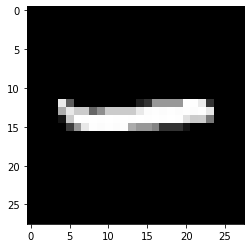

In [6]:
first_image = training_data[1]
print(len(first_image))
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [72]:
dataSet = np.genfromtxt('MNISTnumImages5000_balanced.txt')
classLables = np.genfromtxt('MNISTnumLabels5000_balanced.txt')
data = np.concatenate((dataSet, np.array([classLables]).T), axis=1)
np.random.shuffle(data)
num_records = np.size(data, 0)
print(num_records)
training_size = int(np.floor(0.8 * num_records))
print(training_size)
training_data = data[0:training_size, :]
test_data = data[training_size:num_records, :]

5000
4000


In [28]:
%store training_data
%store test_data

Stored 'training_data' (ndarray)
Stored 'test_data' (ndarray)


In [2]:
%store -r training_data
%store -r test_data

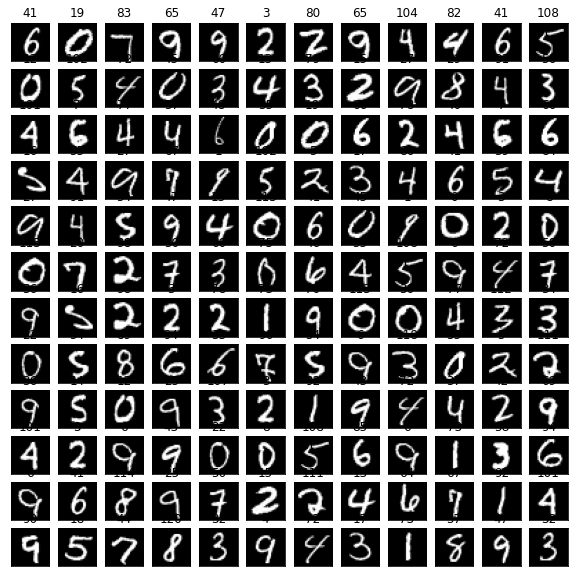

In [62]:
random_neurons=plot_classifier_outputs(training_data[:,:784],(28,28))

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


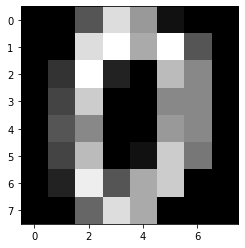

In [30]:
mnist = datasets.load_digits(n_class=10)
print(mnist.data)
first_image = mnist.data[0]
print(first_image)
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((8, 8))
plt.imshow(pixels, cmap='gray')
plt.show()

In [ ]:
x = first_image 
SOMOutput = SOM(x) #return 144x1 matrix where winner 1 and else 0 
classiferoutout = weights x som_output + bias # weights are initialized randomly
error = error_funciton(label_of_first_image - classifierout)
backpropagate error


In [81]:
class SOM(object):

    def __init__(self, x_grid_size, y_grid_size,input_dim, random_neurons,sigma=.8,
                 learning_rate=0.5, random_seed=784):

        self.sigma = sigma
        self.learning_rate = learning_rate
        #self.random_instance = random_neurons
        self.random_instance = np.random.RandomState(random_seed)
        self.weights = self.random_instance.uniform(-1, 1, (x_grid_size,
                                                            y_grid_size,
                                                            input_dim))

        self.activation_map = np.zeros((x_grid_size,y_grid_size))
        self.x_coordinates = np.arange(x_grid_size)
        self.y_coordinates = np.arange(y_grid_size)
        self.neighborhood = self.gaussian
        print(len(self.weights))
               
    def _decay_function(self, decaying_variable, iteration_index, temperature):
        return (decaying_variable * np.exp(-(iteration_index) / temperature))

    def _norm(self,x):
        return np.linalg.norm(x)

    def _activate(self,sample):
        grid_difference = np.subtract(sample, self.weights)
        iterator = np.nditer(self.activation_map, flags=['multi_index'])
        while not iterator.finished:
            self.activation_map[iterator.multi_index] = self._norm(
                                            grid_difference[iterator.multi_index])
            iterator.iternext()

    def activate(self,sample):
        self._activate(sample)
        return self.activation_map
    
    def gaussian(self,center,sigma):
        x_center = center[0]
        y_center = center[1]
        variance = sigma*sigma
        gaussian_x = np.exp(-np.power(self.x_coordinates-x_center,2)/(2*variance))
        gaussian_y = np.exp(-np.power(self.y_coordinates-y_center,2)/(2*variance))
        gaussian_neighborhood = np.outer(gaussian_x,gaussian_y)
        return gaussian_neighborhood

    def calculate_winner(self,sample):
        self._activate(sample)
        winner_arg = self.activation_map.argmin()
        winner_coordinates =  np.unravel_index(winner_arg, self.activation_map.shape)
        return winner_coordinates

    def update(self, sample, winner_coordinates, iteration_index):
        eta = self._decay_function(self.learning_rate, iteration_index, self.temperature)
        sig = self._decay_function(self.sigma,iteration_index, self.temperature)
        neighborhood_update = eta * self.neighborhood(winner_coordinates, sig)

        iterator = np.nditer(neighborhood_update, flags=['multi_index'])
        while not iterator.finished:
            self.weights[iterator.multi_index] = self.weights[iterator.multi_index] + \
                                                 neighborhood_update[iterator.multi_index]* \
                                                 (sample-self.weights[iterator.multi_index])
            iterator.iternext()
          

    def set_temperature(self, iteration_number):
        self.temperature = iteration_number/2

    def fit(self,data,number_of_iterations,random_neurons):       
        self.set_temperature(number_of_iterations)
        for iteration in range(number_of_iterations):
            random_int = self.random_instance.randint(len(data))
            random_sample = data[random_int]
            self.update(random_sample,self.calculate_winner(random_sample),iteration)
        return self.weights     

In [82]:
i=0
myDict = {}
for k in range(10):
    myDict[k] = [[0 for l in range(12)] for m in range(12)]

myDict    

{0: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 1: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 2: [[0, 0, 0, 0, 0, 0, 0, 0, 0,

In [83]:
i=0
activationMyDict = {}
for k in range(10):
    activationMyDict[k] = [[0 for l in range(12)] for m in range(12)]

activationMyDict    

{0: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 1: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 2: [[0, 0, 0, 0, 0, 0, 0, 0, 0,

In [84]:
i=0
activationFeatureMyDict = {}
for k in range(10):
    activationFeatureMyDict[k] = [[0 for l in range(12)] for m in range(12)]

activationFeatureMyDict    

{0: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 1: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 2: [[0, 0, 0, 0, 0, 0, 0, 0, 0,

In [85]:
num_hidden_layers = 1
num_neurons = [144, 10]

inputvalue = {}
print("Initializing weights with small random values...")
for layer in range(num_hidden_layers):
    weight_matrix = []
    for neuron_index in range(num_neurons[layer]):
        row = []
        if layer == 0:  
            for index in range(len(data[0])):                    
                row.append(0)                
        else:  
            for index in range(num_neurons[layer - 1] + 1):
                row.append(0)
        weight_matrix.append(row)
inputvalue[layer] = weight_matrix

Initializing weights with small random values...


In [ ]:
num_hidden_layers = 1
num_hidden_neurons=[144]
num_output_neurons = 10
learning_rate =0.5
momentum = 0.1
model = SOM(12, 12, 784, random_neurons,sigma=9, learning_rate=0.5)
print("Training...")
fit_weights = model.fit(test_data[:,:784], 20000,random_neurons)
matrix = [[0 for i in range(12)] for j in range(12)]
matrix_number = [[0 for i in range(12)] for j in range(12)]
labels = [sub[784] for sub in test_data] 
activation_map = [[0 for i in range(12)] for j in range(12)]
balance_accuracy_list = []
inetration = 0
plt.figure(num=None, figsize=(28, 28), dpi=80, facecolor='w', edgecolor='k')
for sample,number in zip(test_data[:,:784], labels):
    input_classifier = [[0 for i in range(12)] for j in range(12)]
    winner = model.calculate_winner(sample)  
    x_coordinate = winner[0]
    y_coordinate = winner[1]       
    matrix[x_coordinate][y_coordinate] = sample
    matrix_number[x_coordinate][y_coordinate] = matrix_number[x_coordinate][y_coordinate] + 1   
    inputvalue[0][x_coordinate][y_coordinate] = 1
    i=i+1
    n =int(number)
    myDict[n][x_coordinate][y_coordinate] = myDict[n][x_coordinate][y_coordinate] + 1
    activationMyDict[n][x_coordinate][y_coordinate] = 1
    activationFeatureMyDict[n][x_coordinate][y_coordinate] = sample
    input_classifier[x_coordinate][y_coordinate] = 1
    mlp_training_error4,weights_classifier4, balance_accuracy = train_and_classify_previous(num_hidden_layers, num_hidden_neurons,num_output_neurons, learning_rate, momentum, inetration,input_classifier)
    inetration = inetration+1
    if inetration == 5:
        balance_accuracy_list.append(balance_accuracy)
        


12
Training...


In [87]:
for i in range(10):
    dic = myDict[i]
    for j in range(12):
        for k in range(12):
            if dic[j][k] != 0:
                myDict[i][j][k] = dic[j][k]/100
         
        
myDict

{0: [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.01],
  [0, 0, 0, 0, 0, 0, 0, 0, 0.01, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.01, 0.01],
  [0, 0.02, 0, 0, 0, 0.01, 0, 0, 0, 0, 0, 0.09],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.02, 0.16],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.04, 0.16],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.01, 0.01, 0.08],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.08, 0.1],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.05, 0.08],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.04],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
 1: [[0.2, 0.16, 0.14, 0.16, 0.12, 0, 0, 0, 0, 0, 0, 0],
  [0.13, 0.01, 0.01, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0.02, 0, 0, 0, 0.05, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0.01, 0, 0, 0, 0, 0.01, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0.01, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0

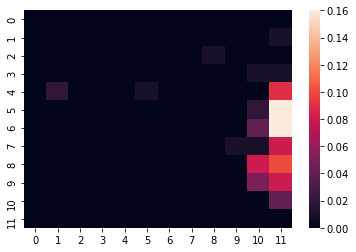

In [89]:
sns.heatmap(myDict[0])

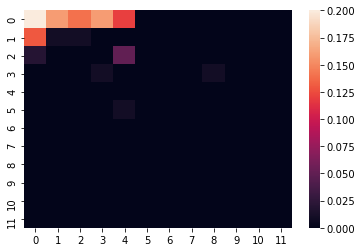

In [90]:
sns.heatmap(myDict[1])

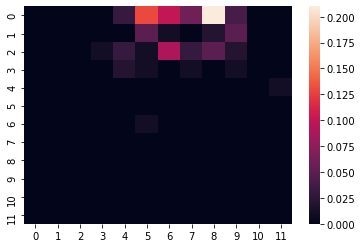

In [91]:
sns.heatmap(myDict[2])

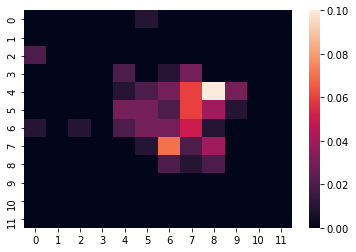

In [92]:
sns.heatmap(myDict[3])

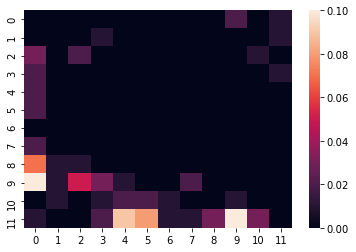

In [93]:
sns.heatmap(myDict[4])

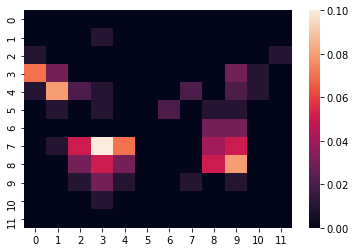

In [94]:
sns.heatmap(myDict[5])

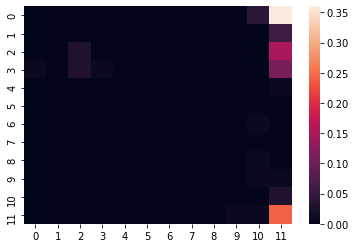

In [95]:
sns.heatmap(myDict[6])

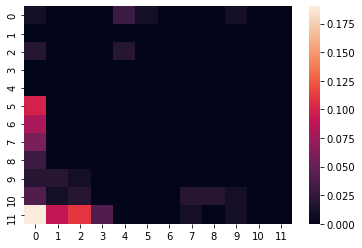

In [96]:
sns.heatmap(myDict[7])

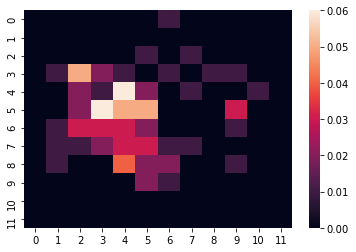

In [97]:
sns.heatmap(myDict[8])

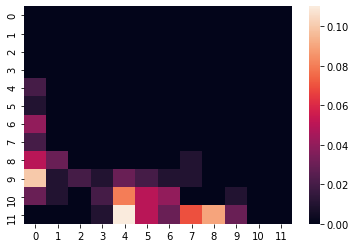

In [98]:
sns.heatmap(myDict[9])

In [144]:
%store myDict

Stored 'myDict' (dict)


In [102]:
%store matrix
%store matrix_number

Stored 'matrix' (list)
Stored 'matrix_number' (list)


In [10]:
%store -r matrix

In [15]:
%store -r matrix_number

In [57]:
def plot_classifier_outputs_matrix(weights_classifier, dims):
    plt.figure(figsize=(10, 10))
    count = 0
  
    for i in range(12):       
        for j in range(12):           
            ax = plt.subplot(12, 12, count+1)    
            if isinstance(weights_classifier[i][j], np.ndarray) == False:
                weights_classifier[i][j] = [[0 for i in range(28)] for j in range(28)]
            hidden_image = np.array(weights_classifier[i][j], dtype='float')
            plt.imshow((hidden_image.reshape(*dims)).T, cmap='gray')       
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)
            count = count+1          
    plt.title('SOM applied to MNIST')
    plt.show()        
   

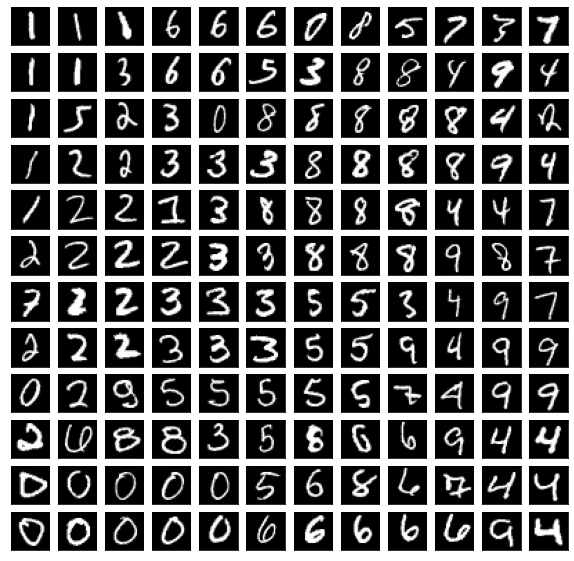

In [94]:
plot_classifier_outputs_matrix(matrix,(28,28))


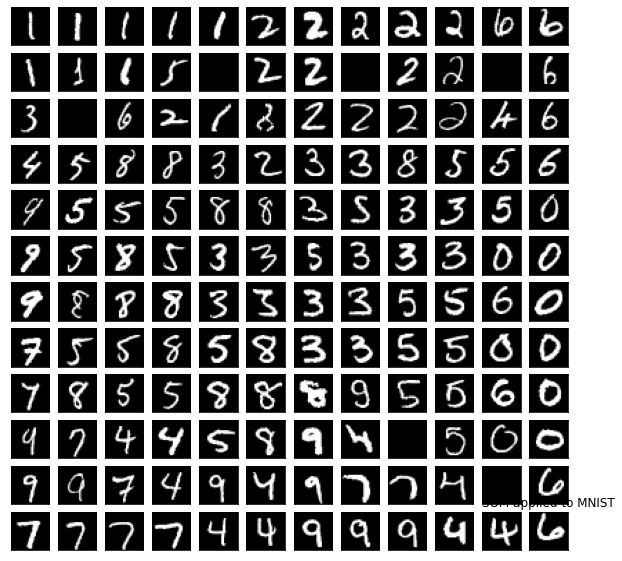

In [88]:
plot_classifier_outputs_matrix(matrix,(28,28))

In [59]:
matrix_number

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 33, 0, 0, 0, 0, 0],
 [3, 0, 0, 0, 18, 24, 0, 0, 0, 0, 0, 0],
 [0, 46, 42, 32, 161, 1, 6, 0, 0, 0, 0, 0],
 [6, 49, 0, 62, 179, 3, 14, 2, 0, 0, 0, 0],
 [1, 4, 3, 19, 3, 3, 0, 0, 0, 0, 0, 0],
 [0, 11, 12, 17, 165, 2, 72, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]]

In [46]:
for n in range(10):
    for i in range(12):       
        for j in range(12):  
            if isinstance(activationFeatureMyDict[n][i][j], np.ndarray) == False:                   
                activationFeatureMyDict[n][i][j] = [[0 for i in range(28)] for j in range(28)]      
             

In [269]:
def plot_classifier_outputs_feature_map(weights_classifier, dims):   
    count = 0
    
    for n in range(10):
        count = 0
        for i in range(12):       
            for j in range(12):  
                plt.figure(figsize=(10, 10))
                ax = plt.subplot(12, 12, count+1) 
                if isinstance(weights_classifier[n][i][j], np.ndarray) == True:                   
                    hidden_image = np.array(weights_classifier[n][i][j], dtype='float')
                    plt.imshow((hidden_image.reshape(*dims)).T, cmap='gray')       
                    ax.get_xaxis().set_visible(False)
                    ax.get_yaxis().set_visible(False)                   
                else:
                    blank = [[0 for i in range(28)] for j in range(28)]
                    hidden_image = np.asarray(blank, dtype='float')
                    plt.imshow((hidden_image.reshape(*dims)).T, cmap='gray')       
                    ax.get_xaxis().set_visible(False)
                    ax.get_yaxis().set_visible(False)
                count = count+1    
                plt.show()       
                #plt.title('SOM applied to MNIST for class:', n)
                     
   

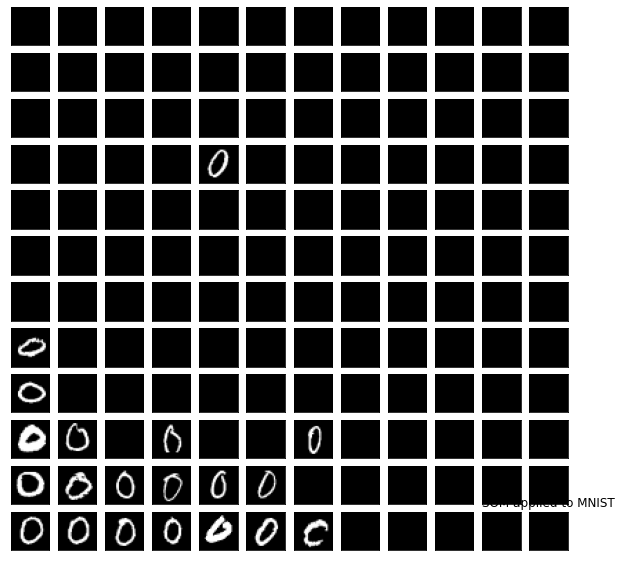

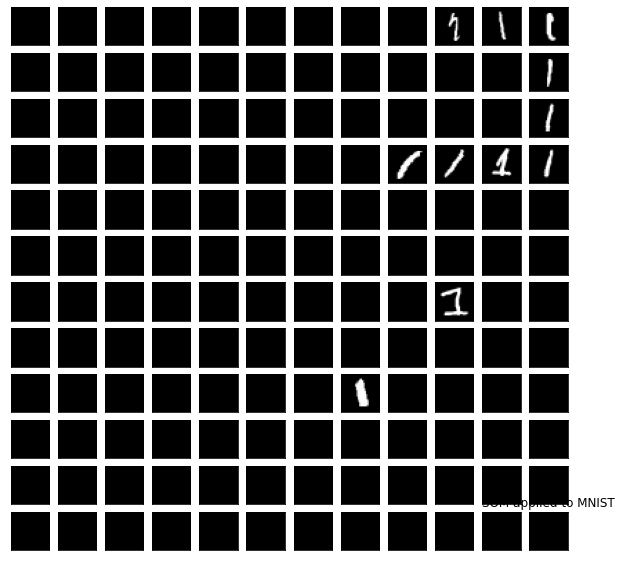

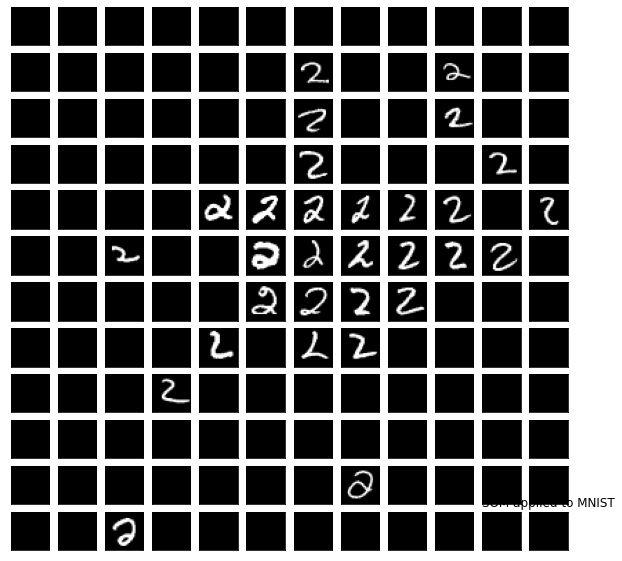

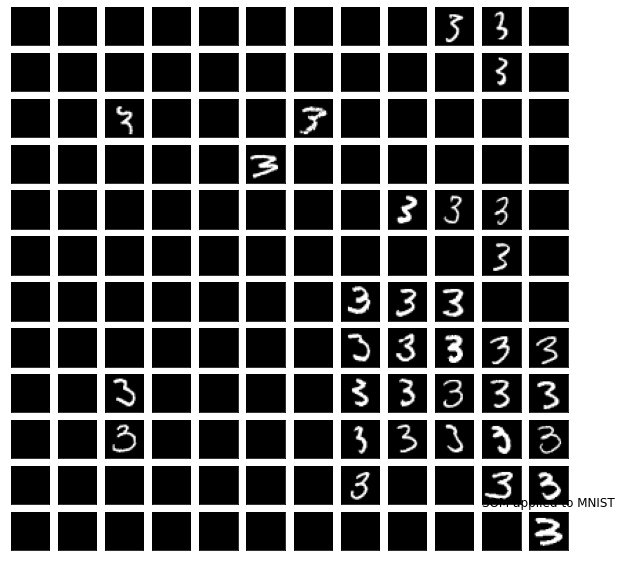

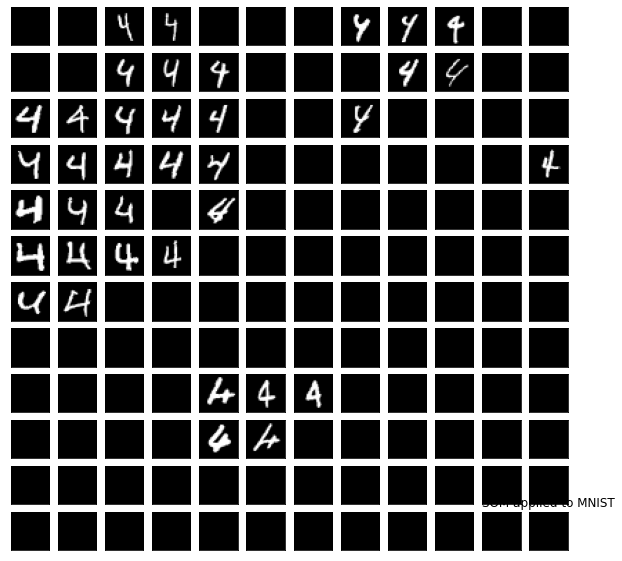

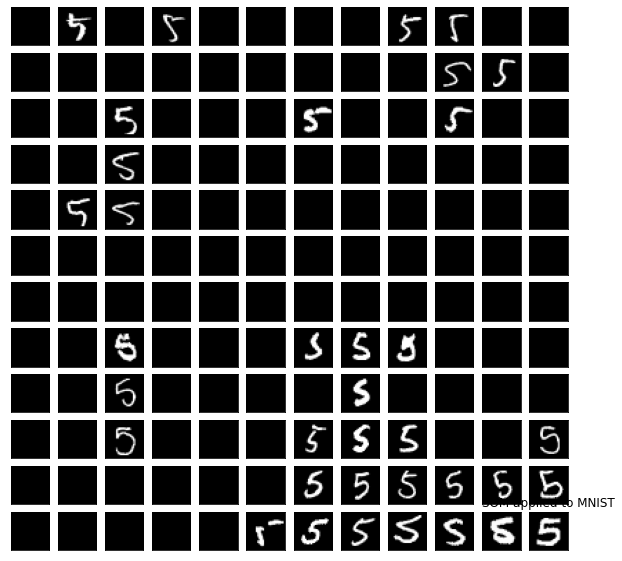

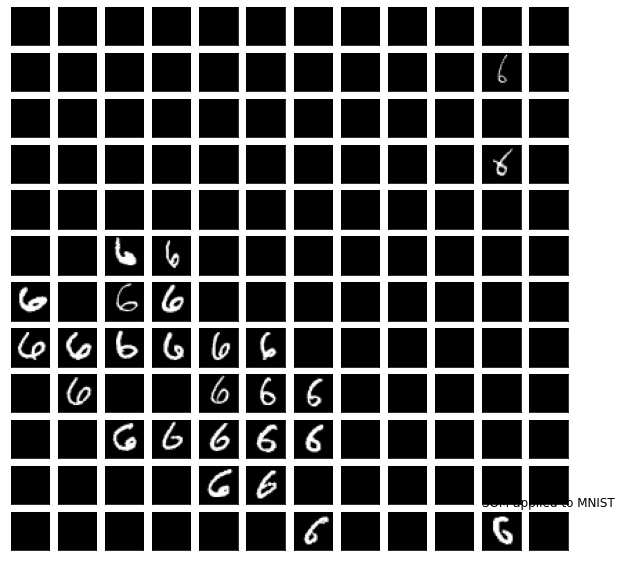

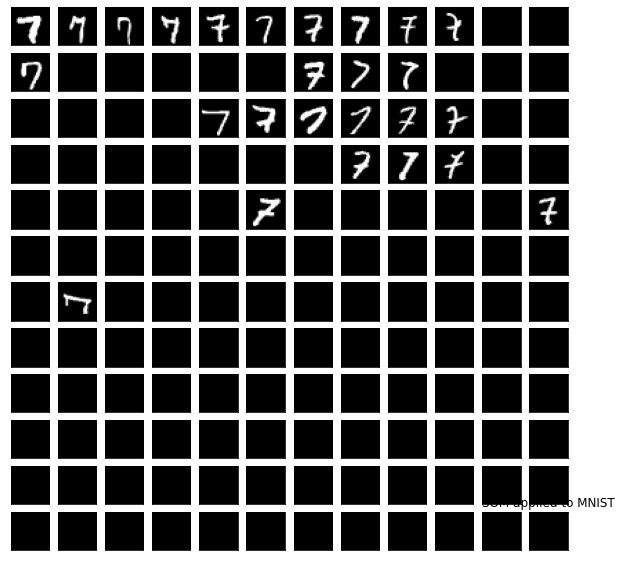

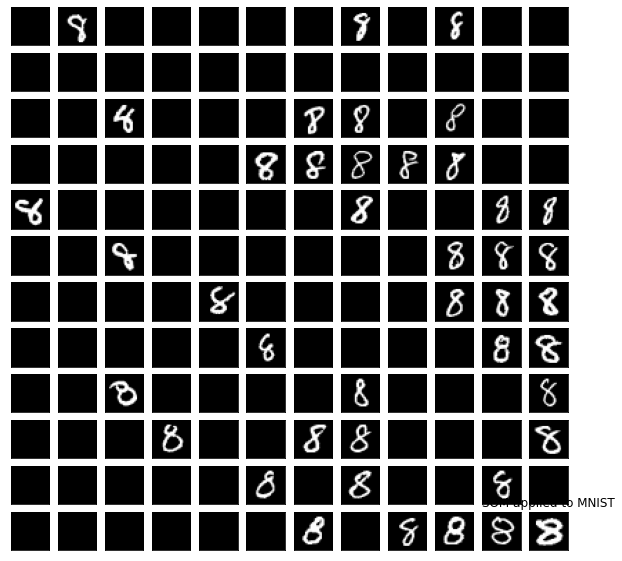

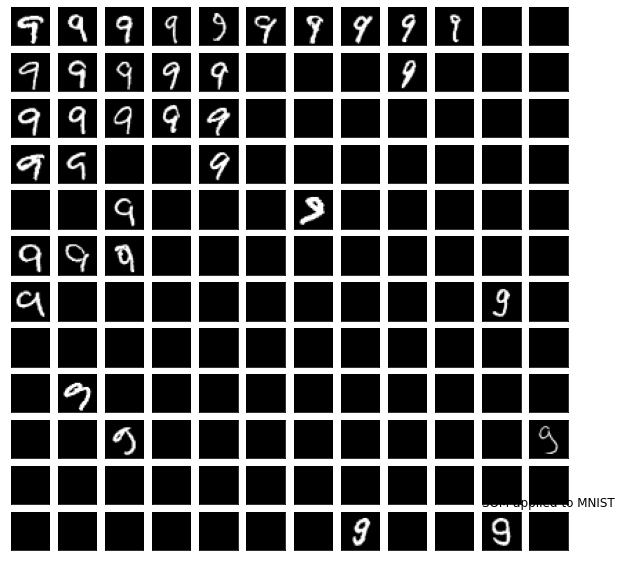

In [79]:
for k in range(10):
    plot_classifier_outputs_matrix(activationFeatureMyDict[k],(28,28))

In [108]:
def sigmoid_activation(x):
    result = (1 / (1 + np.exp(-x)))   
    if result > upper_activation_threshold:
        return 1
    else:  
        return 0
    
# Calculating sigmoid value 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Used to calculate delta 
def gradient_Sigmoid(x):
    result = sigmoid(x) / ((1 + sigmoid(x)) ** 2)
    return result


In [106]:
def classify(data, num_hidden_layers, num_neurons, weights):
    num_incorrect_classifications = 0
    confusion_mat = [[0 for i in range(10)] for j in range(10)]
    
    activation = {}
    # Traverse through datapoints 
    for data_idx in range(len(data)):
        data_pt = data[data_idx]
        output_layer = num_hidden_layers
        # Traverse through number of hidden layers 
        for layer in range(num_hidden_layers + 1):
            weight_matrix = weights[layer]
            activation_results = []
            # Traverse through number of neurons 
            for neuron_idx in range(num_neurons[layer]):
                weighted_sum = 0
                if layer == 0:  # Initial layer
                    # Final output = activation_function(sum(weight*each datapoint from batch)+bias)
                    for idx in range(len(data_pt) - 1):
                        weighted_sum += weight_matrix[neuron_idx][idx] * data_pt[idx]
                else:
                     # If it is not 1st layer, it means we have to take output of previous datapoint
                    for idx in range(num_neurons[layer - 1]):
                        weighted_sum += weight_matrix[neuron_idx][idx] * activation[layer - 1][idx]
                # Adding bias          
                weighted_sum += weight_matrix[neuron_idx][idx + 1]  
                if layer == output_layer:
                    activation_results.append(sigmoid(weighted_sum))
                else:
                    activation_results.append(sigmoid_activation(weighted_sum))
            activation[layer] = activation_results

        predicted_class = activation[output_layer].index(max(activation[output_layer]))
        if predicted_class != int(data_pt[len(data_pt) - 1]):
            num_incorrect_classifications += 1
        confusion_mat[int(data_pt[len(data_pt) - 1])][predicted_class] += 1

    confusion_mat = np.array(confusion_mat)
    # Calculating balance accuracy 
    balane_accuracy = 0
    true_positive = 0
    false_positive = 0
    false_negative = 0
    true_negative = 0
    total = confusion_mat.sum()
    balance_accuracy_total = 0

    for i in range(10):
        # True Positive = 1st number in confusion matrix at diagonal 
        true_positive = confusion_mat[i][i]
        # False Positive = addition of all numbers in row except true positive number
        false_positive = sum(confusion_mat[:,i]) - true_positive
        # False Negative = addition of all numbers in respetive column except true positive 
        false_negative = sum(confusion_mat[i,:]) - true_positive
        # True Negative = addition of all matrix except false positive , false negative and true positive 
        true_negative = total - (false_positive + false_negative + true_positive) 
        sensitivity = true_positive / (true_positive+false_negative)
        specificity =  true_negative/(false_positive+true_negative)
        balane_accuracy = (sensitivity + specificity)/2
        print(true_positive)
        print(false_positive)
        print(false_negative)
        print(true_negative)
        print(balane_accuracy)    
        balance_accuracy_total+=balane_accuracy
    
    
    print("Number of incorrect classifications:", num_incorrect_classifications)
    print("Total number of data points: ", len(data))
    print("Error rate:", num_incorrect_classifications * 100 / len(data))
    print("Confusion Matrix:\n ", confusion_mat)
    print("Balance Accuracy:" , balance_accuracy_total / 10)
    return num_incorrect_classifications * 100 / len(data), confusion_mat, balance_accuracy_total / 10

In [102]:
delta = {}
activation = {}
summation = {}

In [100]:
def train_and_classify(data, num_hidden_layers, num_hidden_neurons, num_output_neurons,
                       learning_rate, momentum, weights_reconst):

    num_epochs = 1
    training_error = []
    balance_accuracy_list =[]
    confusion_matrix_set=[]
    I=int(input("Enter 1 for further learning of final weights of auto-encoder else enter 0"))
    if I == 1:
        learning_rate_1=float(input("Enter Learning Rate for hidden Layer small value(for fine tuning): "))
        

    num_records = np.size(data, 0)
    training_size = int(np.floor(num_records))
    batch_size = int(np.floor(0.4 * training_size))

    # initialize weights - small random values
    num_neurons = []
    num_neurons[:] = num_hidden_neurons[:]
    num_neurons.append(num_output_neurons)
    weights = {}
    changes = {}
    print(num_neurons)
    print("Initializing weights with small random values...")
    for layer in range(num_hidden_layers+1):
        weight_matrix = []
        changes_matrix = []
        for neuron_idx in range(num_neurons[layer]):
            row = []
            change = []
            if layer == 0:  # Initial layer will receive direct input signals
                for idx in range(len(data[0])):
                    #print(layer,neuron_idx,idx,(weights_reconst[layer][neuron_idx][idx]))
                    row.append(weights_reconst[layer][neuron_idx][idx])
                    change.append(0)

            else:  # The other layers will receive signals from the previous layer
                for idx in range(num_neurons[layer-1]+1):
                    row.append(rand.random()/1000)
                    change.append(0)
            weight_matrix.append(row)
            changes_matrix.append(change)
        weights[layer] = weight_matrix
        changes[layer] = changes_matrix

   

    print("Training the multi-layer perceptron... ")
    for epoch in range(num_epochs):
        np.random.shuffle(training_data)
        batch = training_data[0:batch_size]
        if epoch == 0:
            # Initial error prior to training
            result,confusion_matrix,balance_accururacy = classify(batch, num_hidden_layers, num_neurons, weights)
            print("Initial training error:", result)
            training_error.append(result)
            confusion_matrix_set.append(confusion_matrix)


        print("Epoch", epoch+1)
        for data_idx in range(len(batch)):
            data_pt = batch[data_idx]
            # Iterating through the data points and computing the output of each layer
            for layer in range(num_hidden_layers + 1):
                weight_matrix = weights[layer]
                activation_results = []
                summation_results = []
                for neuron_idx in range(num_neurons[layer]):
                    weighted_sum = 0
                    if layer == 0:  # Initial layer
                        # Summation -> weights * input + bias
                        for idx in range(len(data_pt)-1):
                            weighted_sum += weight_matrix[neuron_idx][idx] * data_pt[idx]
                    else:
                        # Summation -> weights * input + bias
                        for idx in range(num_neurons[layer - 1]):
                            weighted_sum += weight_matrix[neuron_idx][idx] * activation[layer-1][idx]
                    weighted_sum += weight_matrix[neuron_idx][idx+1]  # bias
                    # Activation function -> Sigmoid
                    summation_results.append(weighted_sum)
                    activation_results.append(sigmoid_activation(weighted_sum))
                activation[layer] = activation_results
                summation[layer] = summation_results

            # Updating the weights - Back Propagation
            for layer in range(num_hidden_layers, -1, -1):
                is_output_layer = False
                activation_results = activation[layer]
                summation_results = summation[layer]
                delta_values = []
                if layer == num_hidden_layers:
                    is_output_layer = True
                else:
                    outgoing_weight_matrix = weights[layer+1]
                for neuron_idx in range(num_neurons[layer]):
                    delta_temp = 0
                    error = 0
                    if is_output_layer:
                        if activation_results[neuron_idx] == 1:
                            if neuron_idx != int(data_pt[len(data_pt)-1]):
                                error = -1
                        else:
                            if neuron_idx == int(data_pt[len(data_pt)-1]):
                                error = 1
                        delta_temp += error * gradient_Sigmoid(summation_results[neuron_idx])
                    else:
                        for idx in range(num_neurons[layer+1]):
                            delta_temp += outgoing_weight_matrix[idx][neuron_idx]*delta[layer+1][idx]
                        delta_temp *= gradient_Sigmoid(summation_results[neuron_idx])
                    delta_values.append(delta_temp)
                delta[layer] = delta_values

            for layer in range(num_hidden_layers, -1, -1):
                delta_values = delta[layer]
                if layer is not 0:
                    prev_activation_results = activation[layer-1]
                for neuron_idx in range(num_neurons[layer]):
                    # Update weights when delta is not zero
                    delta_value = delta_values[neuron_idx]
                    if delta_value is not 0:
                        if layer == 0:  # Initial layer
                            for idx in range(len(data_pt)-1):
                                if I==1:
                                    change = learning_rate_1*delta_value*data_pt[idx] + \
                                         momentum*changes[layer][neuron_idx][idx]
                                else:
                                    change = 0
                                weights[layer][neuron_idx][idx] += change
                                changes[layer][neuron_idx][idx] = change
                        else:  # The other layers
                            for idx in range(num_neurons[layer-1]):
                                change = learning_rate*delta_value*prev_activation_results[idx] + \
                                         momentum*changes[layer][neuron_idx][idx]
                                weights[layer][neuron_idx][idx] += change
                                changes[layer][neuron_idx][idx] = change
                        change = learning_rate*delta_value + momentum*changes[layer][neuron_idx][idx+1]
                        weights[layer][neuron_idx][idx+1] += change  # Updating bias
                        changes[layer][neuron_idx][idx+1] = change
        if (epoch + 1) % 10 == 0:
            result, confusion_matrix, balance_accuracy = classify(batch, num_hidden_layers, num_neurons, weights)
            print("Training error at epoch " + str(epoch + 1) + ":", result)
            training_error.append(result)
            confusion_matrix_set.append(confusion_matrix)
            balance_accuracy_list.append(1 - balance_accuracy)

    print("Training complete...")
    return training_error, weights, balance_accuracy_list  #, classify(test_data, num_hidden_layers, num_neurons, weights)


<>:115: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:120: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:115: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:120: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-100-2173641ce14e>:115: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if layer is not 0:
<ipython-input-100-2173641ce14e>:120: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if delta_value is not 0:


In [206]:
x, y, balance_accuracy = classify(test_data, 1, [144, 10], inputvalue)

109
891
0
0
0.5
0
0
100
900
0.5
0
0
101
899
0.5
0
0
103
897
0.5
0
0
104
896
0.5
0
0
103
897
0.5
0
0
94
906
0.5
0
0
88
912
0.5
0
0
108
892
0.5
0
0
90
910
0.5
Number of incorrect classifications: 891
Total number of data points:  1000
Error rate: 89.1
Confusion Matrix:
  [[109   0   0   0   0   0   0   0   0   0]
 [100   0   0   0   0   0   0   0   0   0]
 [101   0   0   0   0   0   0   0   0   0]
 [103   0   0   0   0   0   0   0   0   0]
 [104   0   0   0   0   0   0   0   0   0]
 [103   0   0   0   0   0   0   0   0   0]
 [ 94   0   0   0   0   0   0   0   0   0]
 [ 88   0   0   0   0   0   0   0   0   0]
 [108   0   0   0   0   0   0   0   0   0]
 [ 90   0   0   0   0   0   0   0   0   0]]
Balance Accuracy: 0.5


In [89]:
num_hidden_layers = 1
num_hidden_neurons=[144]

num_output_neurons = 10
learning_rate =0.5
momentum = 0.1

mlp_training_error4,weights_classifier4, balance_accuracy_list = train_and_classify(test_data, num_hidden_layers, num_hidden_neurons,num_output_neurons, learning_rate, momentum, fit_weights)


Enter 1 for further learning of final weights of auto-encoder else enter 01
Enter Learning Rate for hidden Layer small value(for fine tuning): 0.01
[144, 10]
Initializing weights with small random values...
Training the multi-layer perceptron... 
0
0
37
363
0.5
0
0
36
364
0.5
0
0
38
362
0.5
0
0
41
359
0.5
0
0
46
354
0.5
0
0
33
367
0.5
47
353
0
0
0.5
0
0
42
358
0.5
0
0
43
357
0.5
0
0
37
363
0.5
Number of incorrect classifications: 353
Total number of data points:  400
Error rate: 88.25
Confusion Matrix:
  [[ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  0 38  0  0  0]
 [ 0  0  0  0  0  0 41  0  0  0]
 [ 0  0  0  0  0  0 46  0  0  0]
 [ 0  0  0  0  0  0 33  0  0  0]
 [ 0  0  0  0  0  0 47  0  0  0]
 [ 0  0  0  0  0  0 42  0  0  0]
 [ 0  0  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]]
Balance Accuracy: 0.5
Initial training error: 88.25
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
0
0
39
361
0.5
0
0
38
362


In [90]:
def balance_accuracy_error(training_error):
    x_values = np.array(range(0, 100, 10))
    plt.figure(2)
    plt.plot(x_values, training_error)
    plt.autoscale(enable=True, axis=u'both', tight=False)
    plt.xlabel('Epochs')
    plt.ylabel('(1-Balance Accuracy)')
    plt.title('Time series of Training Error')
    plt.show()

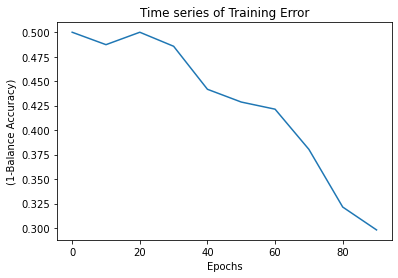

In [91]:
balance_accuracy_error(balance_accuracy_list)

In [113]:
def train_and_classify_previous(num_hidden_layers, num_hidden_neurons, num_output_neurons,
                       learning_rate, momentum, iterations, sominput):
    num_epochs = 1
    training_error = []
    confusion_matrix_set = []
    balance_accuracy_list = []

    #num_records = np.size(sominput, 0)
    #training_size = int(np.floor(num_records))
    #batch_size = int(np.floor(0.4 * training_size))

    # initialize weights - small random values
    num_neurons = []
    num_neurons[:] = num_hidden_neurons[:]
    num_neurons.append(num_output_neurons)
    weights = {}
    changes = {}
    print(num_neurons)
    print("Initializing weights with small random values...")
    for layer in range(num_hidden_layers + 1):
        weight_matrix = []
        changes_matrix = []
        for neuron_idx in range(num_neurons[layer]):
            row = []
            change = []
            if layer == 0:  # Initial layer will receive direct input signals
                for idx in range(len(sominput[0])):
                    # print(layer,neuron_idx,idx,(weights_reconst[layer][neuron_idx][idx]))
                    row.append(rand.random() / 1000)
                    change.append(0)

            else:  # The other layers will receive signals from the previous layer
                for idx in range(num_neurons[layer - 1] + 1):
                    row.append(rand.random() / 1000)
                    change.append(0)
            weight_matrix.append(row)
            changes_matrix.append(change)
        weights[layer] = weight_matrix
        changes[layer] = changes_matrix

   
    print("Training the multi-layer perceptron... ")
    for epoch in range(num_epochs):
        np.random.shuffle(training_data)
        #batch = sominput[0:batch_size]
        if epoch == 0:
            # Initial error prior to training
            result, confusion_matrix, balance_accuracy = classify(sominput, num_hidden_layers, num_neurons, weights)
            print("Initial training error:", result)
            training_error.append(result)
            confusion_matrix_set.append(confusion_matrix)
        print('delta',delta)
        print('activation',activation)
        print('summation',summation)
        print("Epoch", epoch + 1)
        for data_idx in range(len(sominput)):
            data_pt = sominput[data_idx]
            # Iterating through the data points and computing the output of each layer
            for layer in range(num_hidden_layers + 1):
                weight_matrix = weights[layer]
                activation_results = []
                summation_results = []
                for neuron_idx in range(num_neurons[layer]):
                    weighted_sum = 0
                    if layer == 0:  # Initial layer
                        # Summation -> weights * input + bias
                        for idx in range(len(data_pt) - 1):
                            weighted_sum += weight_matrix[neuron_idx][idx] * data_pt[idx]
                    else:
                        # Summation -> weights * input + bias
                        for idx in range(num_neurons[layer - 1]):
                            weighted_sum += weight_matrix[neuron_idx][idx] * activation[layer - 1][idx]
                    weighted_sum += weight_matrix[neuron_idx][idx + 1]  # bias
                    # Activation function -> Sigmoid
                    summation_results.append(weighted_sum)
                    activation_results.append(sigmoid_activation(weighted_sum))
                activation[layer] = activation_results
                summation[layer] = summation_results

            # Updating the weights - Back Propagation
            for layer in range(num_hidden_layers, -1, -1):
                is_output_layer = False
                activation_results = activation[layer]
                summation_results = summation[layer]
                delta_values = []
                if layer == num_hidden_layers:
                    is_output_layer = True
                else:
                    outgoing_weight_matrix = weights[layer + 1]
                for neuron_idx in range(num_neurons[layer]):
                    delta_temp = 0
                    error = 0
                    if is_output_layer:
                        if activation_results[neuron_idx] == 1:
                            if neuron_idx != int(data_pt[len(data_pt) - 1]):
                                error = -1
                        else:
                            if neuron_idx == int(data_pt[len(data_pt) - 1]):
                                error = 1
                        delta_temp += error * gradient_Sigmoid(summation_results[neuron_idx])
                    else:
                        for idx in range(num_neurons[layer + 1]):
                            delta_temp += outgoing_weight_matrix[idx][neuron_idx] * delta[layer + 1][idx]
                        delta_temp *= gradient_Sigmoid(summation_results[neuron_idx])
                    delta_values.append(delta_temp)
                delta[layer] = delta_values

            for layer in range(num_hidden_layers, -1, -1):
                delta_values = delta[layer]
                if layer is not 0:
                    prev_activation_results = activation[layer - 1]
                for neuron_idx in range(num_neurons[layer]):
                    # Update weights when delta is not zero
                    delta_value = delta_values[neuron_idx]
                    if delta_value is not 0:
                        if layer == 0:  # Initial layer
                            for idx in range(len(data_pt) - 1):
                                change = learning_rate * delta_value * data_pt[idx] + momentum * \
                                         changes[layer][neuron_idx][idx]
                                weights[layer][neuron_idx][idx] += change
                                changes[layer][neuron_idx][idx] = change
                        else:  # The other layers
                            for idx in range(num_neurons[layer - 1]):
                                change = learning_rate * delta_value * prev_activation_results[idx] + \
                                         momentum * changes[layer][neuron_idx][idx]
                                weights[layer][neuron_idx][idx] += change
                                changes[layer][neuron_idx][idx] = change
                        change = learning_rate * delta_value + momentum * changes[layer][neuron_idx][idx + 1]
                        weights[layer][neuron_idx][idx + 1] += change  # Updating bias
                        changes[layer][neuron_idx][idx + 1] = change
        if  inetration % 5 == 0:
            result, confusion_matrix, balance_accuracy = classify(sominput, num_hidden_layers, num_neurons, weights)
            print("Training error at epoch " + str(epoch + 1) + ":", result)
            training_error.append(result)
            confusion_matrix_set.append(confusion_matrix)
            balance_accuracy_list.append(1 - balance_accuracy)

    print("Training complete...")
    return training_error, weights, balance_accuracy_list  # , classify(test_data, num_hidden_layers, num_neurons, weights)



<>:110: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:115: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:110: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:115: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-113-6ad6a401ddfa>:110: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if layer is not 0:
<ipython-input-113-6ad6a401ddfa>:115: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if delta_value is not 0:
